In [1]:
import yfinance as yf
import mplfinance as mpf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = yf.download('ARM')
display(df.head())
display(df.tail())

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-14,56.099998,66.279999,55.540001,63.590000,63.590000,130534500
2023-09-15,68.629997,69.000000,60.750000,60.750000,60.750000,74568900
2023-09-18,57.950001,58.741001,55.020000,58.000000,58.000000,34571900
2023-09-19,56.250000,56.779999,53.880001,55.169998,55.169998,18308600
2023-09-20,55.169998,55.400002,51.520000,52.910000,52.910000,16369500


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-14,159.899994,167.690002,153.500000,157.889999,157.889999,22260000
2024-06-17,160.169998,162.699997,153.619995,160.289993,160.289993,12826900
2024-06-18,160.029999,177.309998,159.320007,174.130005,174.130005,22339100
2024-06-20,173.130005,173.850006,156.000000,160.770004,160.770004,22162300
2024-06-21,156.561996,162.199997,151.373001,160.300003,160.300003,21727700


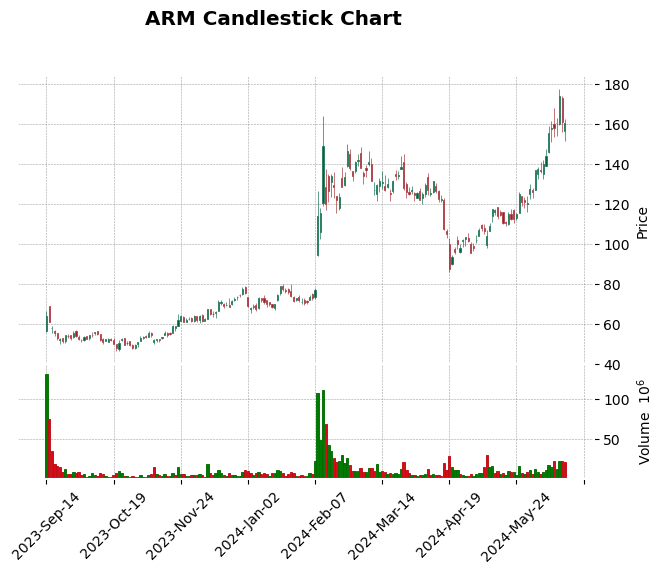

In [3]:
mpf.plot(df, type='candle', style='charles', title='ARM Candlestick Chart', volume=True)

The argrelextrema function from the scipy.signal module is used to find the indices of relative extrema (mins and maxes) in an array of data points.

In [4]:
data = np.array([1, 3, 2, 4, 3, 5])
maxima_indices = argrelextrema(data=data, comparator=np.greater, order=1, mode='clip')
minima_indices = argrelextrema(data=data, comparator=np.less, order=1, mode='clip')

print("Maxima indices:", maxima_indices)
print("Minima indices:", minima_indices)

Maxima indices: (array([1, 3], dtype=int64),)
Minima indices: (array([2, 4], dtype=int64),)


Support is the price level where a downtrend can be expected to pause due to a concentration of demand or buying interest. It’s like a floor where the price finds it difficult to fall below before potentially bouncing back upwards

Resistance is the price level where an uptrend can pause or reverse due to a concentration of selling interest. It acts as a ceiling, preventing the price of an asset from rising above this level before possibly dropping again

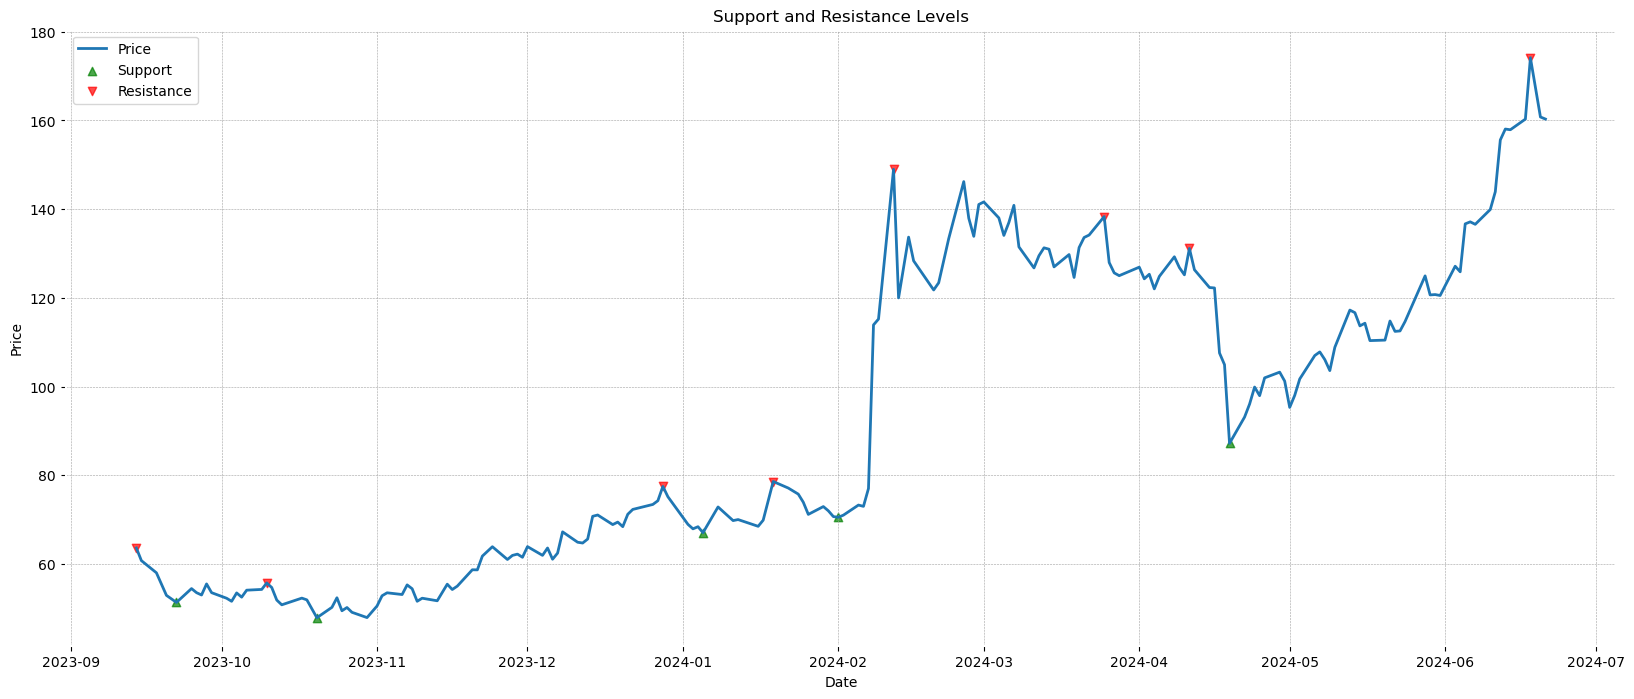

In [5]:
WINDOW = 10 

df['min'] = df.iloc[argrelextrema(df['Close'].values, np.less_equal, order=WINDOW)[0]]['Close']
df['max'] = df.iloc[argrelextrema(df['Close'].values, np.greater_equal, order=WINDOW)[0]]['Close']

plt.figure(figsize=(20, 8))
plt.plot(df.index, df['Close'], label='Price')
plt.scatter(df.index, df['min'], color='green', label='Support', marker='^', alpha=0.7)
plt.scatter(df.index, df['max'], color='red', label='Resistance', marker='v', alpha=0.7)
plt.title('Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()